# BADM 575 Supply Chain Analytics - Homework 1
##### By Kanchan Singh and Ahzam Kazmi

# Import libraries

In [1]:
# Import libraries. 
import pandas as pd 
import numpy as np
import statistics as st
import scipy.stats as stat
import math
import matplotlib as mlp 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
# import torch 
# import torch.nn as nn
# import torch.optim as optim
from scipy import stats
# from torch.nn import functional as F
# from torchviz import make_dot
import sklearn 
# import tensorflow as tf 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
import scipy.optimize as opt
from statsmodels.stats.anova import anova_lm

# Load data

In [2]:
# Load the csv data garments_worker_productivity.csv 
d = pd.read_csv("garments_worker_productivity.csv", sep=",", header=0)
#d <- pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv", header = TRUE, as.is = TRUE)
# Display the first 5 rows
d.head(n=5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# 1. Data processing

### Part a.

In [3]:
# Remove the column ‘wip’ from the dataset
d.drop('wip', axis=1, inplace=True)
d.head(n=5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


### Part b.

In [4]:
# Create variable ‘log_productivity’
d['log_productivity'] = np.log(d['actual_productivity'] * 100)
d.head(n=5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,log_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,4.544066
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,4.484696
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,4.382504


### Part c.

In [5]:
# Create variable ‘log_no_of_workers’
d['log_no_of_workers'] = np.log(d['no_of_workers'])
d.head(n=5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,log_productivity,log_no_of_workers
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,4.544066,4.077537
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,4.484696,2.079442
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739,3.417727
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739,3.417727
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,4.382504,4.025352


In [6]:
d.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
log_productivity         float64
log_no_of_workers        float64
dtype: object

### Part d.

In [7]:
# Convert 'team', 'quarter', 'department', and 'day' into factor variables
columns_to_convert = ['team', 'quarter', 'department', 'day']
d[columns_to_convert] = d[columns_to_convert].astype('category')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   date                   1197 non-null   object  
 1   quarter                1197 non-null   category
 2   department             1197 non-null   category
 3   day                    1197 non-null   category
 4   team                   1197 non-null   category
 5   targeted_productivity  1197 non-null   float64 
 6   smv                    1197 non-null   float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
 14  log_productivity       1197 non-null   f

### Part e.

In [8]:
# Create variable ‘percentage_achivement’
d['percentage_achievement'] = ((d['actual_productivity'] - d['targeted_productivity']) / d['targeted_productivity']) * 100
d.head(n=5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,log_productivity,log_no_of_workers,percentage_achievement
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,4.544066,4.077537,17.590678
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,4.484696,2.079442,18.200000
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739,3.417727,0.071311
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739,3.417727,0.071311
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,4.382504,4.025352,0.047743


### Part f.

In [9]:
# Fixing extra space error in values of 'department' variable
d['department'] = d['department'].replace({'finishing ': 'finishing', 'sweing': 'sewing'})
d['department'].unique()

['sewing', 'finishing']
Categories (2, object): ['finishing', 'sewing']

# 2. Exploratory Analysis

### Part a.

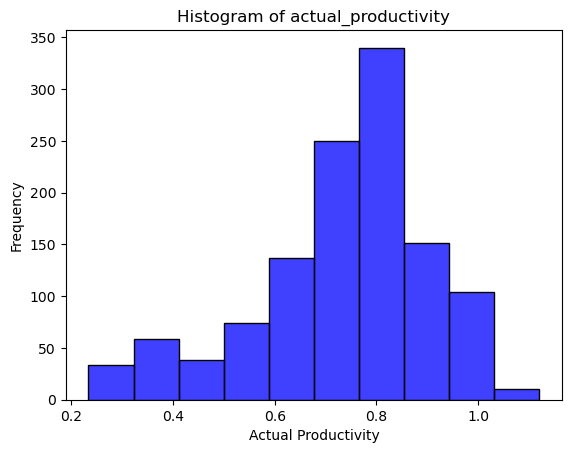

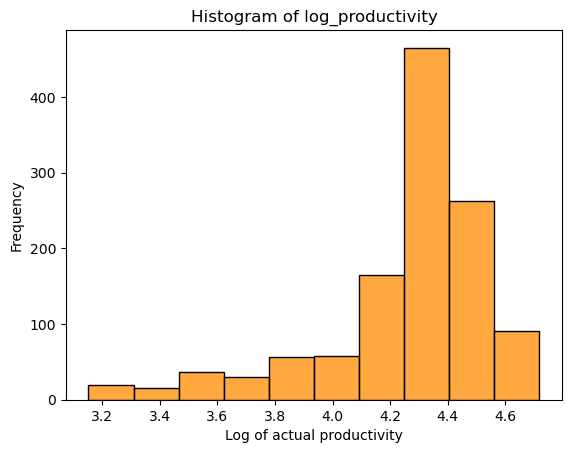

In [10]:
# Histogram of actual_productivity
sns.histplot(d['actual_productivity'], bins=10, kde=False, color='blue')
# Set labels and title
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Histogram of actual_productivity')
# Show the plot
plt.show()

# Histogram of log_productivity
sns.histplot(d['log_productivity'], bins=10, kde=False, color='darkorange')
# Set labels and title
plt.xlabel('Log of actual productivity')
plt.ylabel('Frequency')
plt.title('Histogram of log_productivity')
# Show the plot
plt.show()

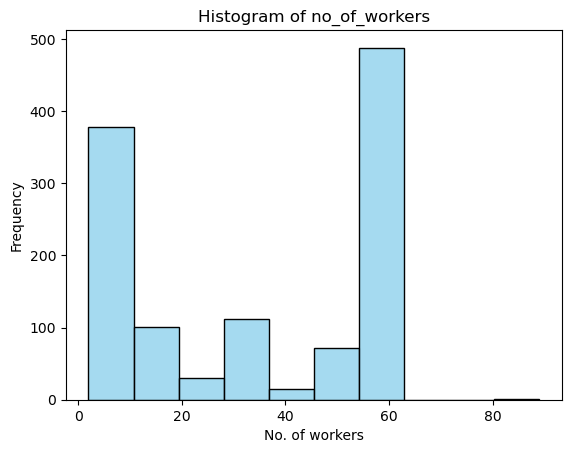

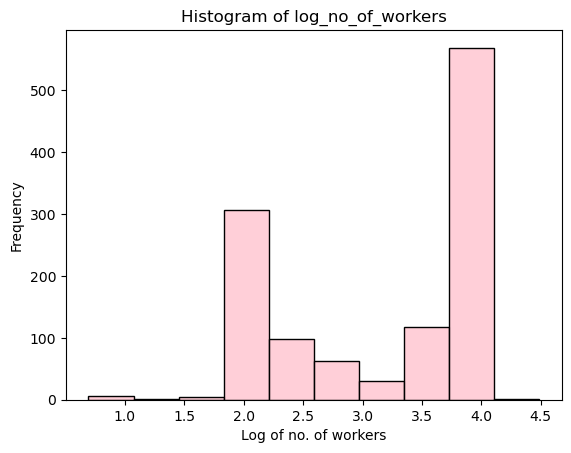

In [11]:
# Histogram of no_of_workers
sns.histplot(d['no_of_workers'], bins=10, kde=False, color='skyblue')
# Set labels and title
plt.xlabel('No. of workers')
plt.ylabel('Frequency')
plt.title('Histogram of no_of_workers')
# Show the plot
plt.show()

# Histogram of log_no_of_workers
sns.histplot(d['log_no_of_workers'], bins=10, kde=False, color='pink')
# Set labels and title
plt.xlabel('Log of no. of workers')
plt.ylabel('Frequency')
plt.title('Histogram of log_no_of_workers')
# Show the plot
plt.show()

#### In the histograms above, we can see that the log transformation has compressed the scale, emphasizing differences in the lower part of the distribution.

### Part b.

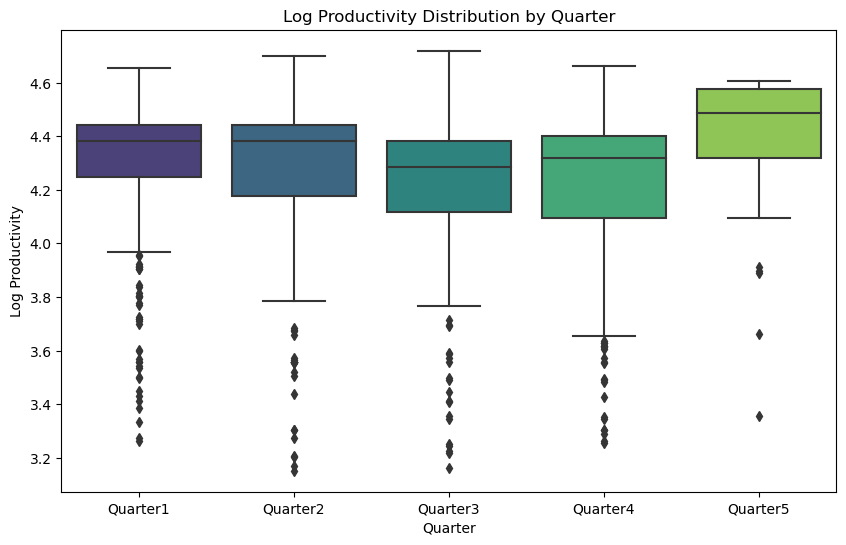

In [12]:
# Box plot of log of productivity by each quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='log_productivity', data=d, palette='viridis')
plt.title('Log Productivity Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Log Productivity')
plt.show()

#### We can see from the box plot that the productivity of workers increases in the fifth quarter compared to the previous quarters.

#### The null hypothesis, H0, states that there is no significant difference between means of log_productivity of two quarters (quarter 5 and others). p-value is a measure that helps assess the strength of the evidence against a null hypothesis. For 95% confidence interval, if the p-value is less than 0.05 then the result is statistically significant and the null hypothesis will be rejected.

##### t-test to compare productivity in different quarters:

In [43]:
## t-tests for means of each quarter

# Defining a funtion to perform t-test
def perform_t_test(q_1, q_5, quarter_name):
    mean_1, std_1 = q_1.mean(), q_1.std()
    t_statistic, p_value = stats.ttest_ind(q_5, q_1, equal_var=False)

    print(f"T-Test for Quarter 5 vs. {quarter_name}:")
    print(f"Mean for {quarter_name}: {mean_1}")
    print(f"Std. dev. for {quarter_name}: {std_1}")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")
    print(f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}\n")

# Filtering log_productivity values for quarter 5
q_5 = d[d['quarter'] == 'Quarter5']['log_productivity']

quarters = ['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4']

# Running a loop to iterate through each quarter to find mean of log_productivity and perform t-test
for quarter in quarters:
    q = d[d['quarter'] == quarter]['log_productivity']
    perform_t_test(q, q_5, quarter)

T-Test for Quarter 5 vs. Quarter1:
Mean for Quarter1: 4.29040482887196
Std. dev. for Quarter1: 0.2591164707730898
T-Statistic: 2.0560323178368356
P-Value: 0.04477644835424828
Conclusion: Reject H0

T-Test for Quarter 5 vs. Quarter2:
Mean for Quarter2: 4.274406271704468
Std. dev. for Quarter2: 0.2852128144316104
T-Statistic: 2.3826953393284502
P-Value: 0.02064495127494748
Conclusion: Reject H0

T-Test for Quarter 5 vs. Quarter3:
Mean for Quarter3: 4.215842682541407
Std. dev. for Quarter3: 0.30286823995442785
T-Statistic: 3.519186431441511
P-Value: 0.0007905297250831344
Conclusion: Reject H0

T-Test for Quarter 5 vs. Quarter4:
Mean for Quarter4: 4.218121006422092
Std. dev. for Quarter4: 0.31457464826990456
T-Statistic: 3.5007513756763666
P-Value: 0.0008519264619537148
Conclusion: Reject H0



#### For each of the t-tests performed, the p-value was less than 5% and therefore, H0 was rejected, which means that the results were statistically significant. That is, there was significant difference between the mean productivity of workers in Q1 through Q4 with respect to Q5. Hence, we can conclude that the productivity of workers increased significantly in the last quarter of each month.

### Part c.
##### t-test to compare the means of productivity on different days

In [14]:
## t-tests for means of each day

# Defining a funtion to perform t-test
def perform_t_test2(monday, sunday, day_name):
    mean_1, std_1 = monday.mean(), monday.std()
    t_statistic, p_value = stats.ttest_ind(sunday, monday, equal_var=False)

    print(f"T-Test for Sunday vs. {day_name}:")
    print(f"Mean: {mean_1}")
    print(f"Std. dev.: {std_1}")
    print(f"T-Statistic: {t_statistic}")
    print(f"P-Value: {p_value}")
    print(f"Conclusion: {'Reject H0' if p_value < 0.05 else 'Fail to reject H0'}\n")

# Filtering log_productivity values for Sundays
sunday = d[d['day'] == 'Sunday']['log_productivity']

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday']

# Running a loop to iterate through each quarter to find mean of log_productivity and perform t-test
for day in days:
    day1 = d[d['day'] == day]['log_productivity']
    perform_t_test2(day1, sunday, day)

T-Test for Sunday vs. Monday:
Mean: 4.258582547269271
Std. dev.: 0.30658683323441227
T-Statistic: -0.2507099893619402
P-Value: 0.80216755110247
Conclusion: Fail to reject H0

T-Test for Sunday vs. Tuesday:
Mean: 4.277596603091672
Std. dev.: 0.26247562060825275
T-Statistic: -0.9567338499523252
P-Value: 0.3392827556916571
Conclusion: Fail to reject H0

T-Test for Sunday vs. Wednesday:
Mean: 4.251953480720157
Std. dev.: 0.3026338898655473
T-Statistic: -0.030093248579534958
P-Value: 0.976007364151365
Conclusion: Fail to reject H0

T-Test for Sunday vs. Thursday:
Mean: 4.245049542679574
Std. dev.: 0.2833696326000889
T-Statistic: 0.20893843953586297
P-Value: 0.8346026868852887
Conclusion: Fail to reject H0

T-Test for Sunday vs. Friday:
Mean: nan
Std. dev.: nan
T-Statistic: nan
P-Value: nan
Conclusion: Fail to reject H0

T-Test for Sunday vs. Saturday:
Mean: 4.284987799978046
Std. dev.: 0.2857186560386306
T-Statistic: -1.1548715635118074
P-Value: 0.24885579897969426
Conclusion: Fail to rejec

#### For each of the t-tests performed the p-value was greater than 5% and therefore, H0 was not rejected, which means that the results were not statistically significant. That is, there was no significant difference between the mean productivity of workers on a Sunday versus any other day of the week.

##### t-test to compare the means of productivity of each no_of_style_change

In [15]:
# Group by 'no_of_style_change' and calculate mean of 'log_productivity'
style_change_means = d.groupby('no_of_style_change')['log_productivity'].mean().reset_index()

# Rename columns for clarity
style_change_means.columns = ['No_of_Style_Change', 'Mean_Productivity']

print(style_change_means)

   No_of_Style_Change  Mean_Productivity
0                   0           4.283915
1                   1           4.079030
2                   2           4.168643


In [16]:
# Storing values of 'log_productivity' for each 'no_of_style_change'
style_0_values = d[d['no_of_style_change'] == 0]['log_productivity']
style_1_values = d[d['no_of_style_change'] == 1]['log_productivity']
style_2_values = d[d['no_of_style_change'] == 2]['log_productivity']

# T-Test for style 0 vs. style 1
t_statistic_01, p_value_01 = stats.ttest_ind(style_0_values, style_1_values, equal_var = False)

print("T-Test for style 0 vs. style 1:")
print(f"T-Statistic: {t_statistic_01}")
print(f"P-Value: {p_value_01}")
print(f"Conclusion: {'Reject H0' if p_value_01 < 0.05 else 'Fail to reject H0'}\n")

# T-Test for style 1 vs. style 2
t_statistic_12, p_value_12 = stats.ttest_ind(style_1_values, style_2_values, equal_var = False)

print("T-Test for style 1 vs. style 2:")
print(f"T-Statistic: {t_statistic_12}")
print(f"P-Value: {p_value_12}")
print(f"Conclusion: {'Reject H0' if p_value_12 < 0.05 else 'Fail to reject H0'}\n")

# T-Test for style 0 vs. style 2
t_statistic_02, p_value_02 = stats.ttest_ind(style_0_values, style_2_values, equal_var = False)

print("T-Test for style 0 vs. style 2:")
print(f"T-Statistic: {t_statistic_02}")
print(f"P-Value: {p_value_02}")
print(f"Conclusion: {'Reject H0' if p_value_02 < 0.05 else 'Fail to reject H0'}\n")

T-Test for style 0 vs. style 1:
T-Statistic: 6.931566606054514
P-Value: 1.5465471743420846e-10
Conclusion: Reject H0

T-Test for style 1 vs. style 2:
T-Statistic: -1.7709266485279305
P-Value: 0.0813473818627427
Conclusion: Fail to reject H0

T-Test for style 0 vs. style 2:
T-Statistic: 2.688489324662045
P-Value: 0.010938219088310231
Conclusion: Reject H0



#### The results of these t-tests are a bit different. Here we can conclude that there is no significant difference between workers' productivity for 1 style change vs. 2 style changes. There is, however, significant difference between workers' productivity when there is no style change vs for 1 style change and 2 style changes respectively.

##### t-test to compare the means of productivity of each department

In [17]:
# Group by 'department' and calculate mean of 'log_productivity'
department_means = d.groupby('department')['log_productivity'].mean().reset_index()

# Rename columns for clarity
department_means.columns = ['Department', 'Mean_Productivity']

print(department_means)

  Department  Mean_Productivity
0  finishing           4.276473
1     sewing           4.250058


In [18]:
# Storing values of 'log_productivity' for each 'department'
finishing_values = d[d['department'] == 'finishing']['log_productivity']
sewing_values = d[d['department'] == 'sewing']['log_productivity']

# T-Test for finishing vs. sewing departments
t_statistic_d, p_value_d = stats.ttest_ind(finishing_values, sewing_values, equal_var = False)

print("T-Test for finishing vs. sewing departments:")
print(f"T-Statistic: {t_statistic_d}")
print(f"P-Value: {p_value_d}")
print(f"Conclusion: {'Reject H0' if p_value_d < 0.05 else 'Fail to reject H0'}\n")

T-Test for finishing vs. sewing departments:
T-Statistic: 1.509773308631646
P-Value: 0.131436886705995
Conclusion: Fail to reject H0



#### For the above t-test, the p-value is greater than 5%, and hence we can conclude that there is no significant difference between workers' productivity in the sewing and finishing departments.

### Part d.

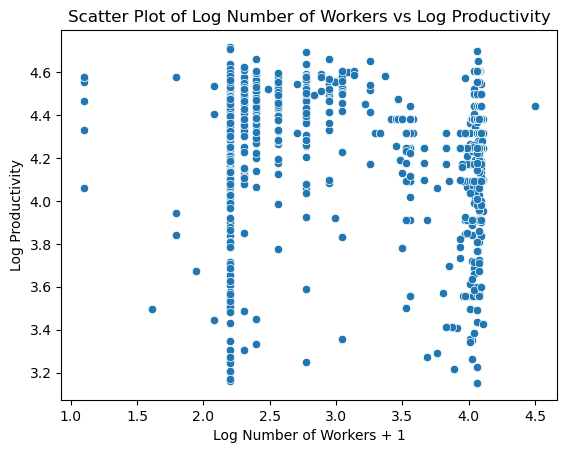

Correlation Coefficient between Log Number of Workers and Log Productivity: -0.0028604695961483508


In [44]:
# Scatter Plot of Log Number of Workers vs. Log Productivity
sns.scatterplot(x=np.log(d['no_of_workers'] + 1), y='log_productivity', data=d)
plt.title('Scatter Plot of Log Number of Workers vs Log Productivity')
plt.xlabel('Log Number of Workers + 1')
plt.ylabel('Log Productivity')
plt.show()

correlation_coefficient = np.corrcoef(np.log(d['no_of_workers'] + 1), d['log_productivity'])[0, 1]
print(f"Correlation Coefficient between Log Number of Workers and Log Productivity: {correlation_coefficient}")

#### From the scatter plot, we can see that there is no pattern to the plots and visibly there is no correlation between the productivity and number of workers in a team. The correlation coefficient of approx. -0.0028 further confirms this as it suggests a very weak, almost negligible, linear relationship between these two variables. The negative sign indicates a small negative correlation, but the value is close to zero and does not give strong grounds to conclude any meaningful relationship.

### Part e.

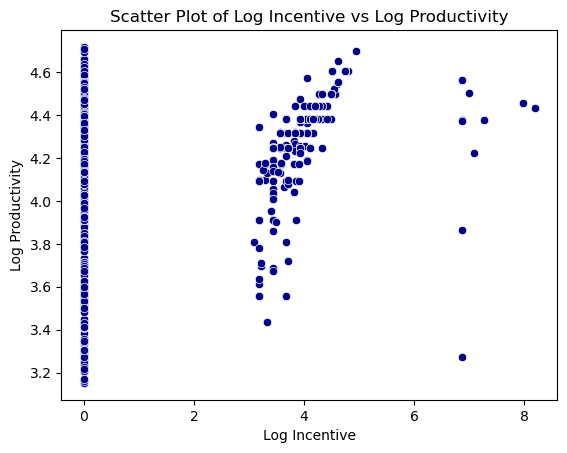

Correlation Coefficient between Log Incentive and Log Productivity: 0.2149897525502221


In [20]:
# Scatter Plot of Log Incentive vs. Log Productivity
sns.scatterplot(x=np.log(d['incentive'] + 1), y='log_productivity', data=d, color='darkblue')
plt.title('Scatter Plot of Log Incentive vs Log Productivity')
plt.xlabel('Log Incentive')
plt.ylabel('Log Productivity')
plt.show()

correlation_coefficient = np.corrcoef(np.log(d['incentive'] + 1), d['log_productivity'])[0, 1]
print(f"Correlation Coefficient between Log Incentive and Log Productivity: {correlation_coefficient}")

#### From the scatter plot, we can see that there is somewhat positive correlation between the productivity and incentive. The correlation coefficient of approx. 0.215 confirms this as it suggests a very weak positive linear relationship between these two variables. Although there is some positive correlation, it is still relatively weak and again does not give us strong grounds to conclude any meaningful relationship.

### Part f.

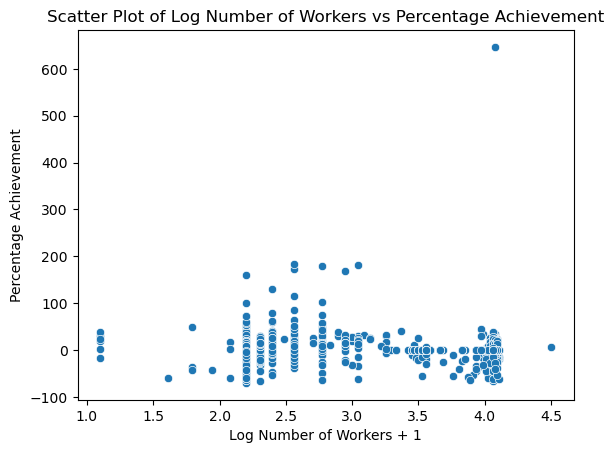

Correlation Coefficient between Log Number of Workers and Percentage Achievement: -0.008026734383457768


In [21]:
# Scatter Plot of Log Number of Workers vs. Percentage Achievement
sns.scatterplot(x=np.log(d['no_of_workers'] + 1), y='percentage_achievement', data=d)
plt.title('Scatter Plot of Log Number of Workers vs Percentage Achievement')
plt.xlabel('Log Number of Workers + 1')
plt.ylabel('Percentage Achievement')
plt.show()

correlation_coefficient = np.corrcoef(np.log(d['no_of_workers'] + 1), d['percentage_achievement'])[0, 1]
print(f"Correlation Coefficient between Log Number of Workers and Percentage Achievement: {correlation_coefficient}")


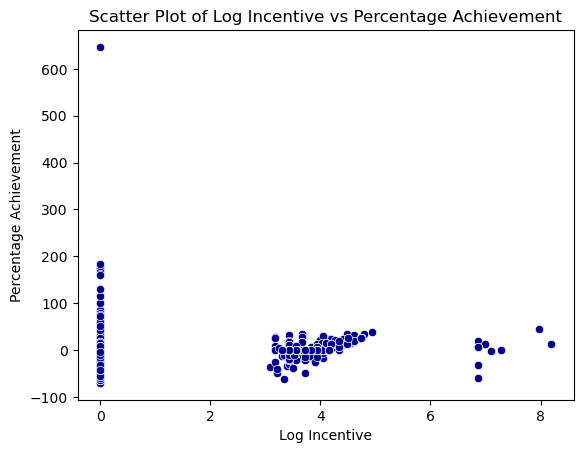

Correlation Coefficient between Log Incentive and Percentage Achievement: 0.049258617234319894


In [22]:
# Scatter Plot of Log Incentive vs. Percentage Achievement
sns.scatterplot(x=np.log(d['incentive'] + 1), y='percentage_achievement', data=d, color='darkblue')
plt.title('Scatter Plot of Log Incentive vs Percentage Achievement')
plt.xlabel('Log Incentive')
plt.ylabel('Percentage Achievement')
plt.show()

correlation_coefficient = np.corrcoef(np.log(d['incentive'] + 1), d['percentage_achievement'])[0, 1]
print(f"Correlation Coefficient between Log Incentive and Percentage Achievement: {correlation_coefficient}")

#### Summarizing for both the above scatter plots here: Visually we can see that there is no pattern in the plots between incentive/number of workers in a team with the percentage achievement of productivity. The correlations coefficients of -0.008 and 0.0493 are very weak and do not quantify a strong relationship between the variables.

# 3. Regression Analysis

### Part a.

In [47]:
# Code for regression
## Create variable for logarithm of no_of_workers + 1:
d['log_workers_plus1'] = np.log(d['log_no_of_workers'] + 1)

model1 = smf.ols(formula='log_productivity ~ log_workers_plus1', data=d)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_productivity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02746
Date:                Thu, 29 Feb 2024   Prob (F-statistic):              0.868
Time:                        12:42:40   Log-Likelihood:                -213.68
No. Observations:                1197   AIC:                             431.4
Df Residuals:                    1195   BIC:                             441.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2524      0.054     78.875      0.000       4.147       4.358
log_workers_plus1     0.0062      0.038      0.166      0.868      -0.067       0.080
==============================================================================
Omnibus:                      339.848   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.832
Skew:                          -1.569   Prob(JB):                    5.59e-169
Kurtosis:                       5.386   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

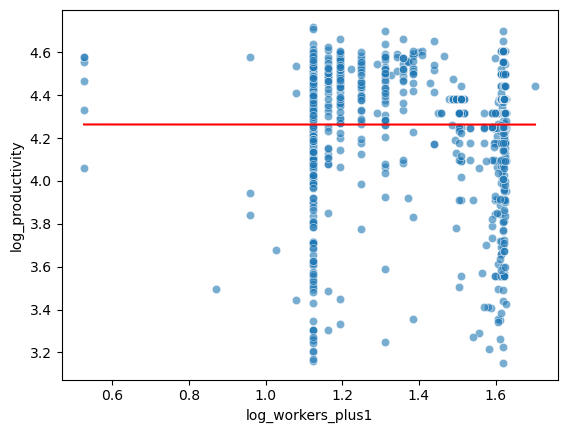

In [48]:
# Scatterplot
sns.scatterplot(x='log_workers_plus1', y='log_productivity', data=d, alpha=0.6)

# Regression line
x_values = np.linspace(d['log_workers_plus1'].min(), d['log_workers_plus1'].max(), 100)
y_values = 4.2635 - 0.0005 * x_values
plt.plot(x_values, y_values, color='red', label='Regression Line')

#### Inferences

Based on these results, the model does not appear to be a good fit for the data, and the variable log_no_of_workers_plus1 does not have a statistically significant impact on log_productivity. Following are specific explanations for each aspect:

- The R-squared value is 0, indicating that the model explains very little variance in productivity using log of number of workers + 1 as a predictor. The Adjusted R-squared is slightly negative, suggesting that adding the predictor does not improve the model.

- The coefficient for the log_workers_plus1 is 0.0062, and the p-value is 0.868. The high p-value suggests that the predictor is not statistically significant, and the coefficient is very close to zero. Hence, team size is not a good predictor for productivity of workers.

- This finding aligns with the analysis in part 2d. The lack of statistical significance and the negligible coefficient indicate that the relationship between team size and productivity is weak or non-existent.

- Estimated regression equation is: log_productivity = 4.2635 − 0.0005 × log_no_of_workers_plus1

- In the regression line plotted above, we can see that slope of the regression line is very close to zero. This indicates that team size as a predictor is not contributing significantly to explaining the variability in the response variable (productivity of workers).

### Part b.

In [25]:
# Code for regression
## Create variable for logarithm of incentive + 1:
d['log_incentive_plus1'] = np.log(d['incentive'] + 1)
d.head(3)

model2 = smf.ols(formula='log_productivity ~ log_incentive_plus1', data=d)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_productivity   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     57.91
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           5.54e-14
Time:                        09:38:38   Log-Likelihood:                -185.37
No. Observations:                1197   AIC:                             374.7
Df Residuals:                    1195   BIC:                             384.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.2009      0.011    368.832      0.000       4.179       4.223
log_incentive_plus1     0.0307      0.004      7.610      0.000       0.023       0.039
==============================================================================
Omnibus:                      273.631   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.579
Skew:                          -1.320   Prob(JB):                    2.77e-120
Kurtosis:                       5.019   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

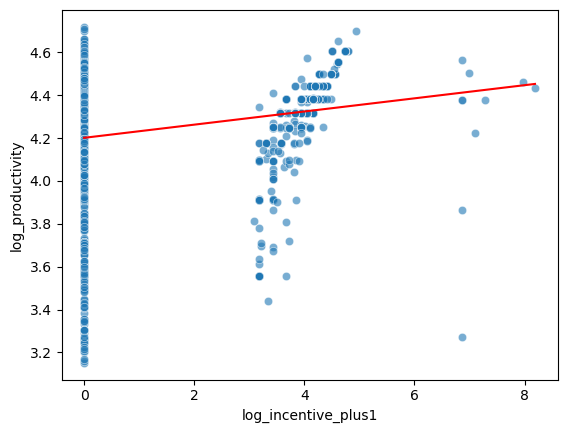

In [26]:
# Scatterplot
sns.scatterplot(x='log_incentive_plus1', y='log_productivity', data=d, alpha=0.6)

# Regression line
x_values2 = np.linspace(d['log_incentive_plus1'].min(), d['log_incentive_plus1'].max(), 100)
y_values2 = 4.2009 + 0.0307 * x_values2
plt.plot(x_values2, y_values2, color='red', label='Regression Line')

#### Inferences

Based on the updated model with log of incentive + 1 as a predictor, it shows a better fit with an increased R-squared value. Following are specific explanations for each aspect:

- The R-squared value has increased to 0.046, suggesting that the model now explains a slightly larger proportion of variability in the dependent variable (log_productivity). While still relatively low, it indicates a better fit compared to the previous model with R-squared close to 0.

- The coefficient for the log_incentive_plus1 variable is 0.0307, and the p-value is < 0.05 which suggests that the predictor is statistically significant, and the positive coefficient indicates a positive relationship between incentive and productivity.

- This finding aligns with what we saw in part 2e. The statistical significance (p < 0.05) of the predictor, and positive correaltion between predictor and response variable show that incentive is a good predictor of productivity of workers. 

- Estimated egression equation: log_productivity = 4.2009 + 0.0307 × log_incentive

- In the plotted regression line above has a positive value slope which is an indicator that incentive is a good predictor for worker productivity.

### Part c.

In [27]:
d.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,log_productivity,log_no_of_workers,percentage_achievement,log_workers_plus1,log_incentive_plus1
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,4.544066,4.077537,17.590678,5.077537,4.595120
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,4.484696,2.079442,18.200000,3.079442,0.000000
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739,3.417727,0.071311,4.417727,3.931826
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,4.382739,3.417727,0.071311,4.417727,3.931826
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,4.382504,4.025352,0.047743,5.025352,3.931826


In [49]:
# Code for regression
d['log_no_of_workers_plus1'] = np.log(d['no_of_workers'] + 1)
d['log_incentive_plus1'] = np.log(d['incentive'] + 1)
d['log_targeted_productivity'] = np.log(d['targeted_productivity'])

model3 = smf.ols(formula = 'log_productivity ~ log_workers_plus1 + log_incentive_plus1 + log_targeted_productivity + no_of_style_change + C(quarter) + C(department) + C(day) + C(team)', data = d)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_productivity   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     20.95
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           7.93e-77
Time:                        14:00:12   Log-Likelihood:                 7.5553
No. Observations:                1197   AIC:                             36.89
Df Residuals:                    1171   BIC:                             169.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.8973      0.116     33.592      0.000       3.670       4.125
C(quarter)[T.Quarter2]       -0.0059      0.019     -0.315      0.753      -0.043       0.031
C(quarter)[T.Quarter3]       -0.0352      0.021     -1.637      0.102      -0.077       0.007
C(quarter)[T.Quarter4]       -0.0499      0.021     -2.384      0.017      -0.091      -0.009
C(quarter)[T.Quarter5]        0.1117      0.041      2.758      0.006       0.032       0.191
C(department)[T.sewing]      -0.4223      0.047     -9.023      0.000      -0.514      -0.330
C(day)[T.Saturday]            0.0304      0.025      1.195      0.233      -0.020       0.080
C(day)[T.Sunday]              0.0155      0.024      0.634      0.526      -0.032       0.063
C(day)[T.Thursday]            0.0135      0.025      0.544      0.587      -0.035       0.062
C(day)[T.Tuesday]             0.0392      0.024      1.608      0.108      -0.009       0.087
C(day)[T.Wednesday]           0.0193      0.024      0.797      0.426      -0.028       0.067
C(team)[T.2]                 -0.0516      0.033     -1.543      0.123      -0.117       0.014
C(team)[T.3]                 -0.0137      0.035     -0.395      0.693      -0.082       0.054
C(team)[T.4]                 -0.0355      0.034     -1.047      0.296      -0.102       0.031
C(team)[T.5]                 -0.0547      0.035     -1.553      0.121      -0.124       0.014
C(team)[T.6]                 -0.1113      0.035     -3.147      0.002      -0.181      -0.042
C(team)[T.7]                 -0.1276      0.035     -3.661      0.000      -0.196      -0.059
C(team)[T.8]                 -0.1239      0.034     -3.676      0.000      -0.190      -0.058
C(team)[T.9]                 -0.1081      0.034     -3.205      0.001      -0.174      -0.042
C(team)[T.10]                -0.1241      0.034     -3.639      0.000      -0.191      -0.057
C(team)[T.11]                -0.1372      0.035     -3.869      0.000      -0.207      -0.068
C(team)[T.12]                -0.0303      0.035     -0.875      0.382      -0.098       0.038
log_workers_plus1             0.5053      0.094      5.393      0.000       0.321       0.689
log_incentive_plus1           0.0648      0.006     10.916      0.000       0.053       0.076
log_targeted_productivity     0.4953      0.043     11.445      0.000       0.410       0.580
no_of_style_change           -0.0271      0.019     -1.431      0.153      -0.064       0.010
==============================================================================
Omnibus:                      352.777   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1269.651
Skew:                          -1.400   Prob(JB):                    1.99e-276
Kurtosis:                       7.197   C

#### Answers:
- (i) log_workers_plus1, log_incentive_plus1 and log_targeted_productivity are significant variables/
- (ii) On average, the log of productivity is estimated to decrease by 0.0271 for each additional style change.
- (iii) On average, the log of productivity is estimated to decrease by 0.0059, 0.0352, 0.0499 in Quarter 2, 3 and 4 respectively compared to Quarter 1, and increase by 0.1117 in Quarter 5 compared to Quarter 1.
- (iv) On average, the log of productivity for the sewing department is estimated to be lower by 0.1117 compared to the finishing department.
- (v)
    Sewing department for a Sunday of quarter 4 for team 10:
    log_productivity = 3.7388 + 0.5053 * log_workers_plus1 + 0.0648 * log_incentive_plus1 + 0.4953 * log_targeted_productivity - 0.0271 * no_of_style_change
  
    Finishing department for a Wednesday of quarter 1 for team 4:
    log_productivity = 3.8811 + 0.5053 * log_workers_plus1 + 0.0648 * log_incentive_plus1 + 0.4953 * log_targeted_productivity - 0.0271 * no_of_style_change
    
    Finishing department for a Monday of quarter 2 for team 8:
    log_productivity = 3.7675 + 0.5053 * log_workers_plus1 + 0.0648 * log_incentive_plus1 + 0.4953 * log_targeted_productivity - 0.0271 * no_of_style_change

### Part c. (vi)

In [33]:
from sklearn.metrics import r2_score

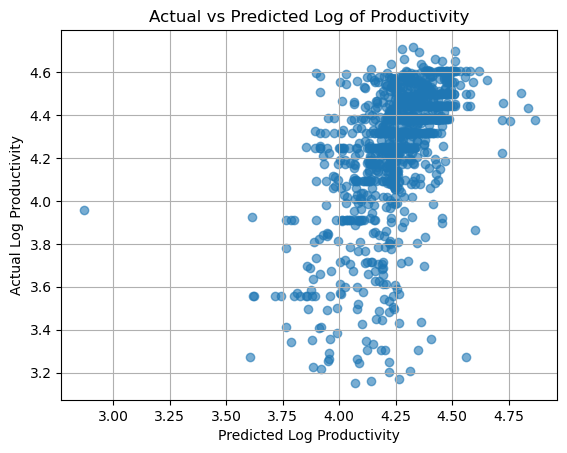

R-squared value: 0.3103929390117358


In [34]:
# Extract actual and predicted log_productivity values from the regression results
actual_log_productivity = results3.model.endog
predicted_log_productivity = results3.fittedvalues

# Create a scatterplot
plt.scatter(predicted_log_productivity, actual_log_productivity, alpha=0.6)
plt.title('Actual vs Predicted Log of Productivity')
plt.xlabel('Predicted Log Productivity')
plt.ylabel('Actual Log Productivity')
plt.grid(True)
plt.show()

# Calculate R-squared value
r_squared = r2_score(actual_log_productivity, predicted_log_productivity)
print(f'R-squared value: {r_squared}')

#### The model explains 31% of variability in the log of productivity. To assess whether the model is a good fit, we need to look at the plot of residuals. Ideally, residuals should be centered around zero. If the residuals have a consistent pattern above or below zero, it suggests that the model is biased and systematically overestimates or underestimates the response variable.

### Part c. (vii)

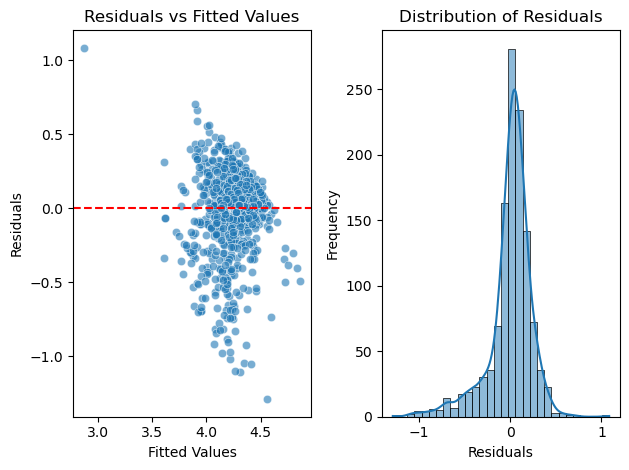

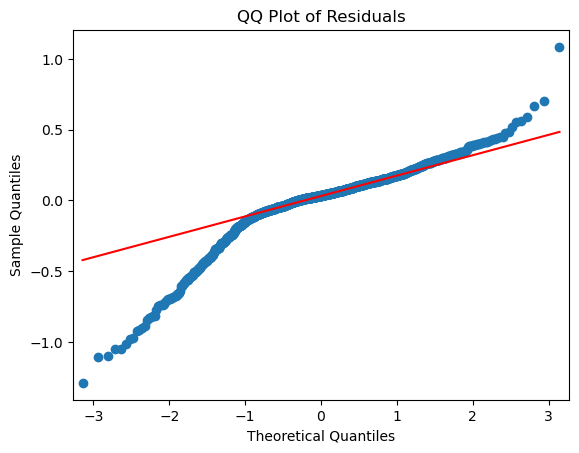

In [35]:
# Extract residuals from the regression results
residuals = results3.resid

## Plotting Residuals
# Residuals vs Fitted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=results3.fittedvalues, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# QQ Plot
sm.qqplot(residuals, line='q')
plt.title('QQ Plot of Residuals')
plt.show()

#### The residuals have an almost normal distribution and hence the model is a good fit.

### Part d.

In [51]:
# Code
formula2 = 'percentage_achievement ~ log_workers_plus1 + log_incentive_plus1 + no_of_style_change + C(quarter) + C(department) + C(day) + C(team)'
model4 = smf.ols(formula2, data = d)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     percentage_achievement   R-squared:                       0.081
Model:                                OLS   Adj. R-squared:                  0.062
Method:                     Least Squares   F-statistic:                     4.306
Date:                    Fri, 01 Mar 2024   Prob (F-statistic):           3.04e-11
Time:                            19:54:35   Log-Likelihood:                -5784.5
No. Observations:                    1197   AIC:                         1.162e+04
Df Residuals:                        1172   BIC:                         1.175e+04
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -57.6792     14.590     -3.953      0.000     -86.304     -29.054
C(quarter)[T.Quarter2]      0.9899      2.363      0.419      0.675      -3.647       5.627
C(quarter)[T.Quarter3]     -2.6143      2.711     -0.964      0.335      -7.933       2.705
C(quarter)[T.Quarter4]     -2.3561      2.638     -0.893      0.372      -7.531       2.819
C(quarter)[T.Quarter5]     12.9564      5.110      2.535      0.011       2.930      22.983
C(department)[T.sewing]   -37.2928      5.896     -6.325      0.000     -48.861     -25.725
C(day)[T.Saturday]          1.1563      3.210      0.360      0.719      -5.142       7.455
C(day)[T.Sunday]           -0.8890      3.083     -0.288      0.773      -6.939       5.161
C(day)[T.Thursday]          3.1522      3.141      1.004      0.316      -3.010       9.314
C(day)[T.Tuesday]           2.3453      3.077      0.762      0.446      -3.691       8.382
C(day)[T.Wednesday]         1.2043      3.055      0.394      0.693      -4.789       7.197
C(team)[T.2]               -5.2685      4.221     -1.248      0.212     -13.549       3.012
C(team)[T.3]               -1.3553      4.385     -0.309      0.757      -9.958       7.248
C(team)[T.4]                0.0642      4.284      0.015      0.988      -8.342       8.470
C(team)[T.5]               -0.3499      4.430     -0.079      0.937      -9.042       8.342
C(team)[T.6]               -8.1475      4.465     -1.825      0.068     -16.908       0.613
C(team)[T.7]               -5.6744      4.399     -1.290      0.197     -14.306       2.957
C(team)[T.8]               -8.2999      4.250     -1.953      0.051     -16.639       0.039
C(team)[T.9]              -11.4867      4.256     -2.699      0.007     -19.837      -3.137
C(team)[T.10]             -11.2503      4.306     -2.613      0.009     -19.698      -2.802
C(team)[T.11]              -9.9473      4.469     -2.226      0.026     -18.714      -1.180
C(team)[T.12]              -5.5651      4.374     -1.272      0.203     -14.146       3.016
log_workers_plus1          56.1153     11.827      4.745      0.000      32.911      79.319
log_incentive_plus1         3.3966      0.736      4.614      0.000       1.952       4.841
no_of_style_change         -2.7489      2.383     -1.153      0.249      -7.425       1.927
==============================================================================
Omnibus:                     1861.166   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1660539.500
Skew:                           9.026   Prob(JB):                         0.00
Kurtosis:                     184.571   Cond. No.                         71.4
====================================================================

#### Answers
- (i) The variables log_workers_plus1 and log_incentive_plus1 significantly affect worker productivity, and their directions are positive.
- (ii) On average, the percentage achievement is estimated to decrease by 2.7489 for each additional style change.
- (iii) On average, the percentage achievement is estimated to decrease by 2.6143, 2.3561 in Quarter 3 and 4 respectively compared to Quarter 1, and increase by 0.9899 and 12.9564 in Quarter 2 and 5 respectively compared to Quarter 1.
- (iv) On average, the percentage achievement for the sewing department is estimated to be lower by 37.2928 compared to the finishing department.
- (v)
    Sewing department for a Sunday of quarter 4 for team 10:
    percentage_achievement = -72.1746 + 56.1153 * log_workers_plus1 + 3.3966 * log_incentive_plus1 - 2.7489 * no_of_style_change
  
    Finishing department for a Wednesday of quarter 1 for team 4:
    percentage_achievement = -57.615 + 56.1153 * log_workers_plus1 + 3.3966 * log_incentive_plus1 - 2.7489 * no_of_style_change
    
    Finishing department for a Monday of quarter 2 for team 8:
    percentage_achievement = −65.9892 + 56.1153 * log_workers_plus1 + 3.3966 * log_incentive_plus1 - 2.7489 * no_of_style_change

### Part d. (vi)

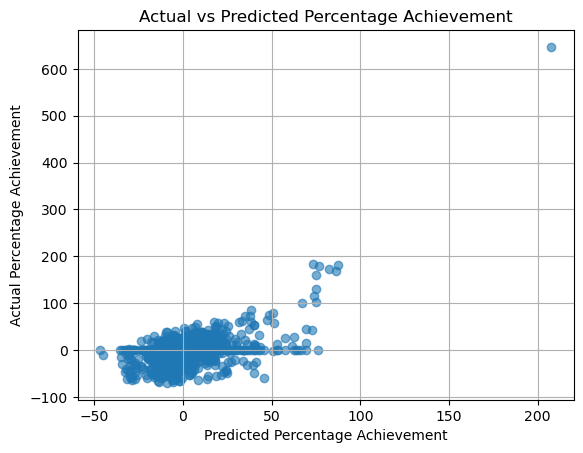

R-squared value: 0.3235709655717127


In [40]:
# Extract actual and predicted log_productivity values from the regression results
actual_percentage_achievement = results4.model.endog
predicted_percentage_achievement = results4.fittedvalues

# Create a scatterplot
plt.scatter(predicted_percentage_achievement, actual_percentage_achievement, alpha=0.6)
plt.title('Actual vs Predicted Percentage Achievement')
plt.xlabel('Predicted Percentage Achievement')
plt.ylabel('Actual Percentage Achievement')
plt.grid(True)
plt.show()

# Calculate R-squared value
r_squared2 = r2_score(actual_percentage_achievement, predicted_percentage_achievement)
print(f'R-squared value: {r_squared2}')

#### The model explains about 32% of variability in percentage achievement. To assess whether the model is a good fit, we need to look at the plot of residuals.

### Part d. (vii)

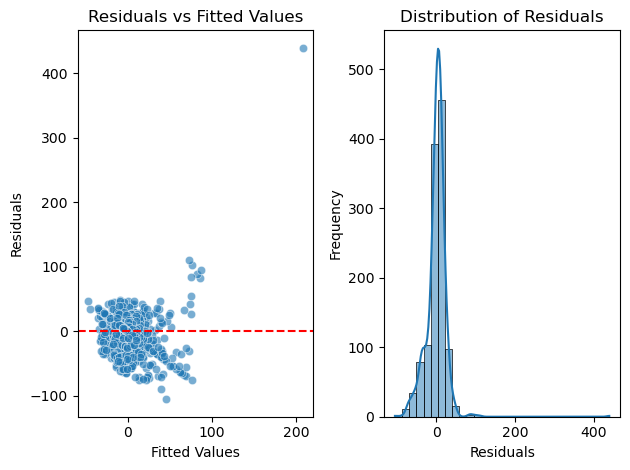

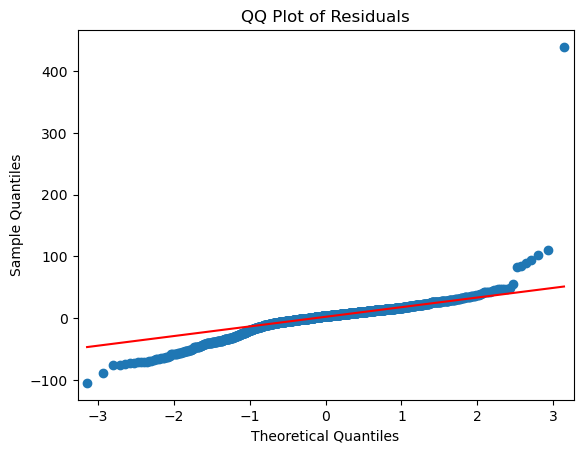

In [41]:
# Extract residuals from the regression results
residuals2 = results4.resid

## Plotting Residuals
# Residuals vs Fitted Values
plt.subplot(1, 2, 1)
sns.scatterplot(x=results4.fittedvalues, y=residuals2, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals2, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# QQ Plot
sm.qqplot(residuals2, line='q')
plt.title('QQ Plot of Residuals')
plt.show()

#### The residuals are not normally distributed, and hence the model is a good fit.

### Part e.

In [39]:
# Code for ANOVA analysis
formula = 'log_productivity ~ log_workers_plus1 + log_incentive_plus1 + log_targeted_productivity + no_of_style_change + C(quarter) + C(department) + C(day) + C(team)'
anova_results = anova_lm(sm.OLS.from_formula(formula, data=d).fit())

# Display the ANOVA results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
C(quarter),4.0,1.896123,0.474031,8.036754,2.161341e-06
C(department),1.0,0.179416,0.179416,3.041834,8.140658e-02
C(day),5.0,0.200122,0.040024,0.678576,6.397415e-01
C(team),11.0,6.992332,0.635667,10.777137,3.909585e-19
log_workers_plus1,1.0,1.676510,1.676510,28.423673,1.168711e-07
log_incentive_plus1,1.0,12.079853,12.079853,204.802704,6.230436e-43
log_targeted_productivity,1.0,7.928167,7.928167,134.414723,1.687965e-29
no_of_style_change,1.0,0.135491,0.135491,2.297131,1.298831e-01
Residual,1171.0,69.068953,0.058983,NaN,NaN


#### Inferences:
Sum of squares is a measure of the total variability explained by each predictor. The sum of squares along with P value are given below. If P value is less than 0.05 then the variable has a statistically significant affect on log productivity

Quarter has a statistically significant impact: Sum of Squares = 1.896123, F = 8.04, p-value < 0.0001

Department: Sum of Squares = 0.179416, F = 3.04, p-value = 0.0814

Day: Sum of Squares = 0.200122, F = 0.68, p-value = 0.6397

Team has a statistically significant impact: Sum of Squares = 6.992332, F = 10.78, p-value < 0.0001

Log of Workers has a statistically significant impact: Sum of Squares = 1.676510, F = 28.42, p-value < 0.0001

Log of Incentive has a statistically significant impact: Sum of Squares = 12.079853, F = 204.80, p-value < 0.0001

Log of Targeted Productivity has a statistically significant impact: Sum of Squares = 7.928167, F = 134.41, p-value < 0.0001

Number of Style Changes: Sum of Squares = 0.135491, F = 2.30, p-value = 0.1299

Among all the variables considered, "Log of Incentive" explains the maximum variance in the response variable, as it has the highest sum of squares (12.08) and the lowest p-value (< 0.0001), indicating its significant impact on the variability in the response variable.

# 4. Managerial Insights
#### We have done a thorough analysis and looked at the data from various angles. Our main aim for the analysis is to search for ways to increase the productivity of garmet manufacturing units. We have observed that the number of workers in a team does not have a significant impact on the productivity but incentive does have a significant positive impact.This means that managers should make decisions to incentivize productivity such as allocating bonuses to employees who meet the targeted productivity level.
#### We also see that workers are more productive in quarter 5 as compared to other quarters, this can be due to many factors and we need to further investigate why this is the case and what we can learn from quarter 5 and implement in other quarters.
#### We see that producivity also varies between different teams, managers should analyze the factors contributing to these differences in team productivity. They can consider conducting performance reviews, providing additional support or resources to underperforming teams, and sharing best practices among teams to improve overall productivity levels.
#### Targeted productivity also has a significant positive impact on productivity which means that managers should ensure that targeted productivity goals are realistic and achievable, as deviations from these goals can affect overall productivity levels.